In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Full dataset
csv_path = "/code/NetHack-Research/data/raw/full_data.csv"

# Load CSV
df = pd.read_csv(csv_path) 
df

,gameid,version,points,deathdnum,deathlev,maxlvl,hp,maxhp,deaths,deathdate,...,death,conduct,turns,achieve,realtime,starttime,endtime,gender0,align0,flags
0,3520378,3.4.3,0,0,1,1,0,10,1,20080322,...,killed by kicking a wall,0xfff,52,0x0,30,1206144424,1206144460,Fem,Neu,-1
1,3520380,3.4.3,0,0,1,1,-1,11,1,20080322,...,killed by kicking a wall,0xfff,10,0x0,125,1206144463,1206144590,Mal,Cha,-1
2,3520795,3.4.3,161,0,3,3,15,15,0,20080322,...,quit,0xfcf,308,0x0,106,1206223951,1206224061,Fem,Cha,-1
3,3521208,3.4.3,250,2,6,6,-17,13,1,20080323,...,killed by a priestess of Brigit,0xfff,8,0x0,632,1206271297,1206300939,Mal,Cha,-1
4,3521210,3.4.3,3,7,-5,1,16,16,0,20080323,...,escaped (in celestial disgrace),0xdff,1,0xe0,46,1206300990,1206301044,Fem,Neu,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511223,2822112,3.6.0,19,0,1,1,11,15,0,20171229,...,quit,0xfcf,124,0x0,239,1511176919,1514545971,Mal,Law,0x4
1511224,2858553,3.6.0,90,0,2,2,-6,14,1,20180205,...,killed by a magic missile,0xfdf,592,0x0,682,1514545991,1517799208,Mal,Law,0x4
1511225,2965129,3.6.0,0,0,1,1,11,11,0,20180626,...,quit,0xfff,68,0x0,123,1529984646,1529984769,Mal,Neu,0x4
1511226,2056247,3.6.1,0,0,1,1,15,15,0,20180914,...,escaped,0xfff,11,0x0,34,1536897505,1536897540,Mal,Law,0x4


In [3]:
print(df.keys())

Index(['gameid', 'version', 'points', 'deathdnum', 'deathlev', 'maxlvl', 'hp',
       'maxhp', 'deaths', 'deathdate', 'birthdate', 'uid', 'role', 'race',
       'gender', 'align', 'name', 'death', 'conduct', 'turns', 'achieve',
       'realtime', 'starttime', 'endtime', 'gender0', 'align0', 'flags'],
      dtype='object')


In [38]:
df_copy = df.copy()

# convert to binary variable
df_copy['ascended'] = (df_copy['death'] == "ascended").astype(int)

# select numerical columns 
num_columns = df_copy.select_dtypes(include=['number']).columns

# compute correlations
corr_matrix = df_copy[num_columns].corr()

ascended_corr = corr_matrix['ascended'].sort_values(ascending=False)
maxlvl_corr = corr_matrix['maxlvl'].sort_values(ascending=False)
turns_corr = corr_matrix['turns'].sort_values(ascending=False)
# display
print("Top 5 correlations with ascension:")
print(ascended_corr[1:6])
print("\n")
print("Top 5 correlations with maxlvl:")
print(maxlvl_corr[1:6])
print("\n")
print("Top 5 correlations with turns:")
print(turns_corr[1:6])

Top 5 correlations with ascension:
maxlvl       0.745196
deathdnum    0.574320
turns        0.243690
points       0.080630
realtime     0.041259
Name: ascended, dtype: float64


Top 5 correlations with maxlvl:
ascended     0.745196
deathdnum    0.598110
deathlev     0.352872
turns        0.309454
points       0.070403
Name: maxlvl, dtype: float64


Top 5 correlations with turns:
points       0.510283
maxlvl       0.309454
ascended     0.243690
deathdnum    0.181342
deathlev     0.074309
Name: turns, dtype: float64


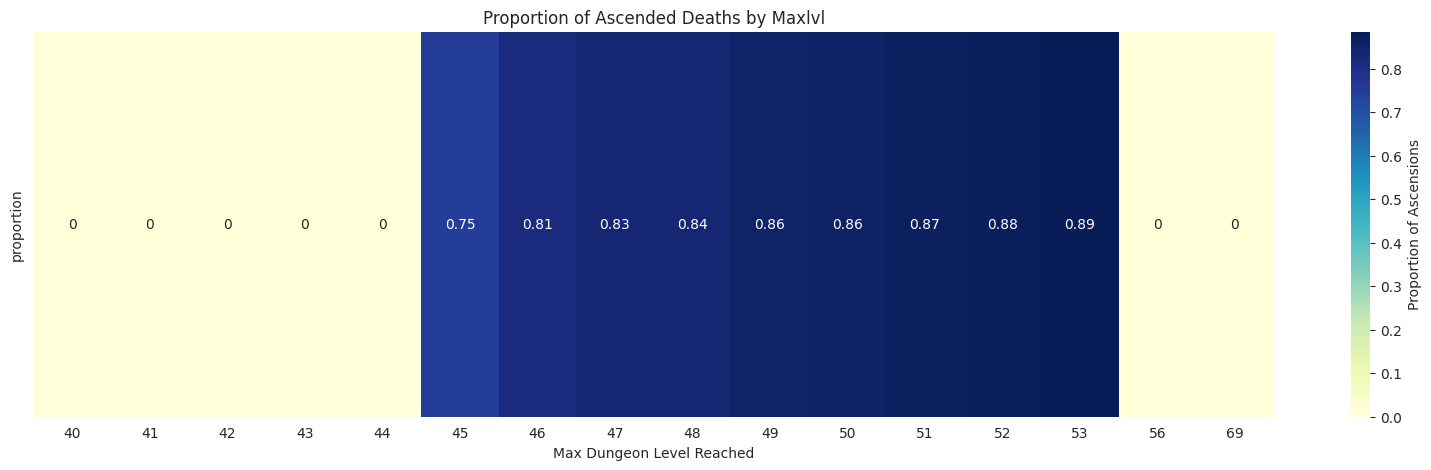

In [30]:
# Filter for ascnded players
ascended = df[df['death'] == 'ascended']

# Group by maxlvl 
# count ascensions
ascension_counts = ascended['maxlvl'].value_counts().sort_index()

# Normalize by total players at each maxlvl 
total_counts = df['maxlvl'].value_counts().sort_index()
ascension_proportions = (ascension_counts / total_counts).fillna(0)  # Proportion of ascended deaths

# Create a DataFrame for ascensions and total counts
ascension_data = pd.DataFrame({
    'ascensions': ascension_counts,
    'total_players': total_counts,
    'proportion': ascension_proportions
}).fillna(0)

# Focus on where ascension occurs
ascension_data = ascension_data.loc[40:69]
ascension_data['log_proportion'] = np.log1p(ascension_data['proportion'])  # log1p handles zeros safely

# Horizontal heatmap for proportions
plt.figure(figsize=(20, 5))  
sns.heatmap(ascension_data[['proportion']].T, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Proportion of Ascensions'})
plt.xlabel('Max Dungeon Level Reached')
plt.ylabel('')
plt.title('Proportion of Ascended Deaths by Maxlvl')

# Show plot 
plt.show()